In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

np.random.seed(241098)
sns.set()
sns.set(rc={'figure.figsize':(10,6)})

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import  RepeatedStratifiedKFold



In [5]:

dados = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


## Analíse Exploratoria 

In [6]:
dados.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

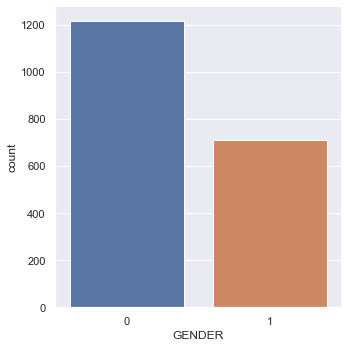

In [7]:
sns.catplot(data=dados, x='GENDER', kind="count")



Pórem pode se notar que o fato de haver cinco linhas(fazendo com que 384 pacienntes virem 1924) pra serem contadas no graficos criados, ele se tornam invalidos.
Será preciso deixar cada paciente com uma linha para poder voltar as analises iniciais.
E tambem só será contabilizado nos graficos pacientes que testaram positivos, para isso sera usada a janela 'ABOVE_12' pois contem 1 se o paciente foi em qualquer momento diagnosticado.

Text(0.5, 0, 'Disease Group')

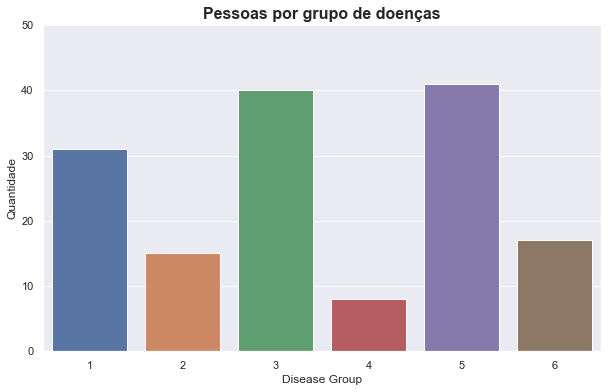

In [8]:
df_janela_unica = dados.loc[(dados['WINDOW'] == 'ABOVE_12') & (dados['ICU'] == 1)]
um = df_janela_unica ['DISEASE GROUPING 1'].sum()
dois =df_janela_unica ['DISEASE GROUPING 2'].sum()
tres =df_janela_unica ['DISEASE GROUPING 3'].sum()
quatro =df_janela_unica ['DISEASE GROUPING 4'].sum()
cinco =df_janela_unica ['DISEASE GROUPING 5'].sum()
seis =df_janela_unica ['DISEASE GROUPING 6'].sum()
lista_grupo = ['1','2','3','4','5','6']
lista_valores = [um, dois, tres, quatro, cinco, seis]

sns.barplot(x=lista_grupo, y=lista_valores)
plt.title('Pessoas por grupo de doenças',  fontweight="bold", fontsize=16)
plt.ylabel('Quantidade')
plt.ylim(0,50)
plt.xlabel('Disease Group')

Das pessoas que testaram positivo, estão mais presentes nos grupos 5 e 3.

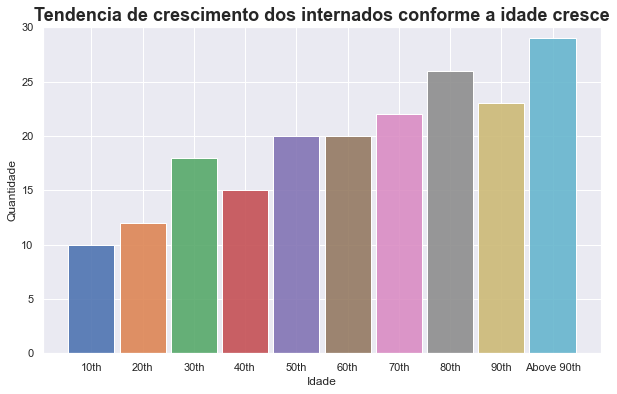

In [9]:

df_janela_unica_hist = df_janela_unica
df_janela_unica_hist['AGE_PERCENTIL'] = pd.Categorical(df_janela_unica_hist['AGE_PERCENTIL'],  ['10th','20th','30th','40th', '50th', '60th', '70th','80th', '90th', 'Above 90th'])

sns.histplot(data=df_janela_unica_hist, x="AGE_PERCENTIL", hue="AGE_PERCENTIL", shrink=.9, alpha=.89,legend=False)
plt.title('Tendencia de crescimento dos internados conforme a idade cresce',  fontweight="bold", fontsize=18)
plt.ylabel('Quantidade')
plt.ylim(0,30)
plt.xlabel('Idade')

plt.show()

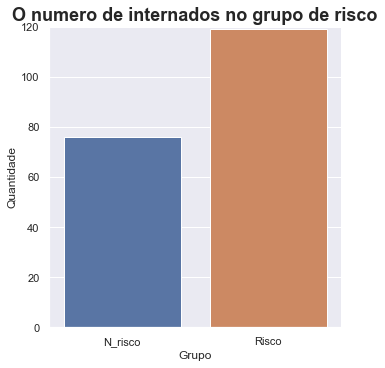

In [10]:
sns.catplot(data=df_janela_unica, x='AGE_ABOVE65', kind='count')
plt.title('O numero de internados no grupo de risco',  fontweight="bold", fontsize=18)
plt.ylabel('Quantidade')
plt.ylim(0,120)
legenda = ['N_risco', 'Risco']
pos = np.arange(len(legenda))
plt.xticks(pos, legenda)
plt.xlabel('Grupo')
plt.show()

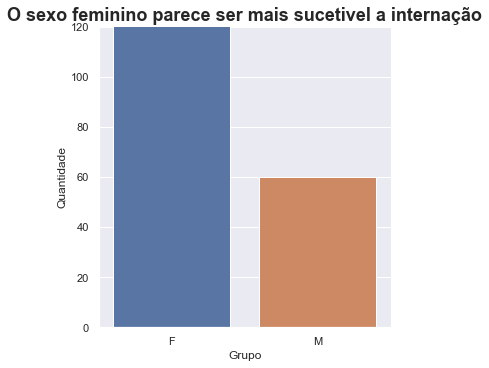

In [11]:

sns.catplot(data=df_janela_unica, x='GENDER', kind="count")
plt.title('O sexo feminino parece ser mais sucetivel a internação',  fontweight="bold", fontsize=18)
plt.ylabel('Quantidade')
plt.ylim(0,120)
legenda = ['F', 'M']
pos = np.arange(len(legenda))
plt.xticks(pos, legenda)
plt.xlabel('Grupo')
plt.show()


# Tratamento 

#### Modelo Dummy

Como ponto de partida fiz um modelo com o DummyClassifier

In [15]:
with open('data_pick', 'rb') as pickle_file:
    dados_para_dummy_classifier = pickle.load(pickle_file)

In [17]:
y = dados_para_dummy_classifier["ICU"]
x = dados_para_dummy_classifier.drop(["ICU"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo_dummy = DummyClassifier()
modelo_dummy.fit(x_train, y_train)

y_prediction = modelo_dummy.predict(x_test)
print("Acerto:",accuracy_score(y_test, y_prediction)*100)

Acerto: 53.40909090909091


In [ ]:
with open('data_pick_final', 'rb') as pickle_file_final:
    dados_final = pickle.load(pickle_file_final)